In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [171]:
#탄수화물 섭취량이 적을 때
def lowCarbohydrate(f):
    lowCarbohydrate, notlowCarbohydrate = 10,12
    
    if f <= lowCarbohydrate:
        return 1
    elif f > notlowCarbohydrate:
        return 0
    elif f > lowCarbohydrate and f <= notlowCarbohydrate:
        return ((notlowCarbohydrate - f) / (notlowCarbohydrate - lowCarbohydrate))

#탄수화물 섭취량이 보통일 때
def mediumCarbohydrate(f):
    notmediumCarbohydrate1, mediumCarbohydrate1, mediumCarbohydrate2, notmediumCarbohydrate2 = 10,12,16,18
    if f > mediumCarbohydrate1 and f <= mediumCarbohydrate2:
        return 1
    elif f <= notmediumCarbohydrate1 or f > notmediumCarbohydrate2:
        return 0
    elif f > notmediumCarbohydrate1 and f <= mediumCarbohydrate1:
        return ((f-notmediumCarbohydrate1) / (mediumCarbohydrate1 - notmediumCarbohydrate1))
    elif f > mediumCarbohydrate2 and f <= notmediumCarbohydrate2:
        return ((notmediumCarbohydrate2 - f) / (notmediumCarbohydrate2 - mediumCarbohydrate2))

#탄수화물 섭취량이 많을 때
def highCarbohydrate(f):
    nothighCarbohydrate, highCarbohydrate = 16,18
    
    if f > highCarbohydrate:
        return 1
    elif f <= nothighCarbohydrate:
        return 0
    elif f > nothighCarbohydrate and f <= highCarbohydrate:
        return ((f - nothighCarbohydrate) / (highCarbohydrate - nothighCarbohydrate))

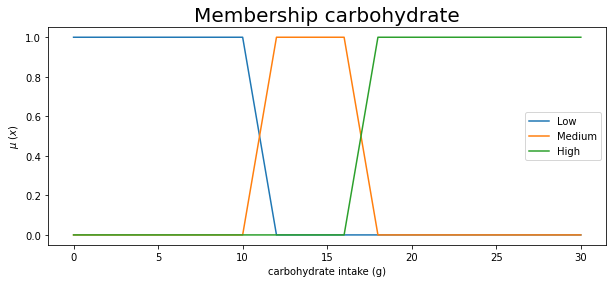

In [172]:
# 탄수화물 섭취량 그래프로 그리기
x = [ i for i in range(31)]
    
ylowC = [lowCarbohydrate(i) for i in x]
ymediumC = [mediumCarbohydrate(i) for i in x]
yhighC = [highCarbohydrate(i) for i in x]

plt.figure(figsize=(10,4))
plt.title('Membership carbohydrate',fontsize = 20)
plt.plot(x, ylowC, label = 'Low')
plt.plot(x, ymediumC, label = 'Medium')
plt.plot(x, yhighC, label = 'High')
plt.xlabel('carbohydrate intake (g)')
plt.ylabel(r'$\mu\ (x)$')
plt.legend()

In [173]:
#당화혈색소가 낮을 때
def lowBlood(x):
    lowBlood , notlowBlood = 6,7
    
    if x <= lowBlood:
        return 1;
    elif x > notlowBlood:
        return 0
    elif x > lowBlood and x <= notlowBlood:
        return ((notlowBlood - x) / (notlowBlood - lowBlood))

#당화혈색소의 비율이 보통일 때(정상일 때)
def mediumBlood(x):
    notmediumBlood1, mediumBlood, notmediumBlood2 = 6,7,8
    
    if x == mediumBlood:
        return 1
    elif x <= notmediumBlood1 or x > notmediumBlood2:
        return 0
    elif x > notmediumBlood1 and x <= mediumBlood:
        return (x - notmediumBlood1) / (mediumBlood - notmediumBlood1)
    elif x > mediumBlood and x <= notmediumBlood2:
        return (notmediumBlood2 - x) / (notmediumBlood2 - mediumBlood)

#당화혈색소의 비율이 많을 때
def highBlood(x):
    nothighBlood, highBlood = 7,8
    
    if x > highBlood:
        return 1
    elif x <= nothighBlood:
        return 0
    elif x > nothighBlood and x <= highBlood:
        return (x - nothighBlood)

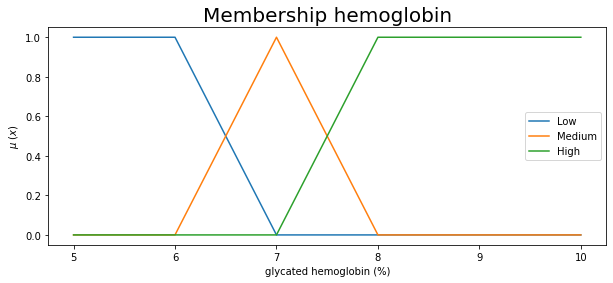

In [174]:
#당화혈색소 소속함수 그리는 그래프

x = [i for i in range(5,11)]

ylowB = [lowBlood(i) for i in x]
ymediumB = [mediumBlood(i) for i in x]
yhighB = [highBlood(i) for i in x]
plt.figure(figsize=(10,4))
plt.title('Membership hemoglobin',fontsize = 20) 
plt.plot(x, ylowB, label = 'Low')
plt.plot(x, ymediumB, label = 'Medium')
plt.plot(x, yhighB, label = 'High')
plt.xlabel('glycated hemoglobin (%)')
plt.ylabel(r'$\mu\ (x)$')
plt.legend()


In [175]:
#FUZZIFICATION 하는 함수를 각각 구한다
# 각각의 소속함수에 대해 low/medium/high의 값을 배열에 저장함

def fuzzificationCarbohydrate(carbohydrateValue):
    carbohydrateSet = []
    carbohydrateSet.append(lowCarbohydrate(carbohydrateValue))
    carbohydrateSet.append(mediumCarbohydrate(carbohydrateValue))
    carbohydrateSet.append(highCarbohydrate(carbohydrateValue))
    return carbohydrateSet

def fuzzificationBlood(bloodValue):
    bloodSet = []
    bloodSet.append(lowBlood(bloodValue))
    bloodSet.append(mediumBlood(bloodValue))
    bloodSet.append(highBlood(bloodValue))
    return bloodSet

In [176]:
#INFERENCE
# 출력값에 정한 규칙을 대입한다.
# and 연산이므로 min의 값을 입력값으로 받는다.

def inference(carbohydrateSet, bloodSet):
    inferenceSet = []
    verylowSet, lowSet, mediumSet, highSet, veryhighSet = [], [], [], [],[]

    # 당화혈색소가 낮으면 verylow (1번 규칙)
    verylowSet.append(bloodSet[0])
    # 탄수화물 섭취량이 적고 당화혈색소가 정상이면 인슐린을 매우 적게 투여한다 (2번 규칙)
    verylowSet.append(min(carbohydrateSet[0], bloodSet[1]))
    
    # 탄수화물 섭취량이 보통이고 당화혈 색소가 정상이면  인슐린을 적게 투여한다 (4번 규칙)
    lowSet.append(min(carbohydrateSet[1], bloodSet[1]))
    
    # 탄수화물 섭취량이 적고 당화혈색소가 높으면 인슐린을 보통만큼 투여한다 (3번 규칙)
    mediumSet.append(min(carbohydrateSet[0], bloodSet[2]))
    # 탄수화물 섭취량이 보통이고 당화혈 색소가 높으면 인슐린을 보통만큼 투여한다 (5번 규칙)
    mediumSet.append(min(carbohydrateSet[1], bloodSet[2]))
    
    #탄수화물 섭취량이 많고 당화혈 색소가 정상이면 인슐린을 많이 투여한다(6번 규칙)
    highSet.append(min(carbohydrateSet[2], bloodSet[1]))
    
    #탄수화물 섭취량이 많고 당화혈 색소가 높으면 인슐린을 매우 많이 투여한다 (7번 규칙)
    veryhighSet.append(min(carbohydrateSet[2], bloodSet[2]))
    
    inferenceSet.append(max(verylowSet))
    inferenceSet.append(max(lowSet))
    inferenceSet.append(max(mediumSet))
    inferenceSet.append(max(highSet))
    inferenceSet.append(max(veryhighSet))
    
    return inferenceSet

In [177]:
#DEFUZZIFICATION
# 스게노를 이용
def defuzzification(inferenceSet):
    multiplier = (inferenceSet[0]*10) + (inferenceSet[1]*20) + (inferenceSet[2]*30) + (inferenceSet[3]*40) + (inferenceSet[4]*50)
    divider = inferenceSet[0] + inferenceSet[1] + inferenceSet[2] + inferenceSet[3] + inferenceSet[4]
    return multiplier/divider

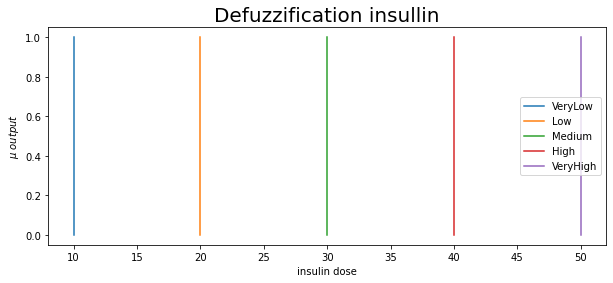

In [178]:
#스게노 그래프
xVerylow = [10,10]
xLow = [20,20]
xMedium = [30,30]
xHigh = [40,40]
xVeryHigh = [50,50]

y = [0,1]

plt.figure(figsize=(10,4))
plt.title('Defuzzification insullin',fontsize = 20)
plt.plot(xVerylow,y,label='VeryLow')
plt.plot(xLow,y,label='Low')
plt.plot(xMedium,y,label='Medium')
plt.plot(xHigh,y,label='High')
plt.plot(xVeryHigh,y,label='VeryHigh')
plt.xlabel('insulin dose')
plt.ylabel(r'$\mu\ output$')
plt.legend()

In [194]:
#계산 
insulinDose = []

fuzziCarbohydrate = int(input("탄수화물 섭취량을 입력하세요: "))
fuzzificationCarbohydrate(fuzziCarbohydrate)

fuzziBlood = int(input("당화혈색소 값을 입력하세요: "))
fuzzificationBlood(fuzziBlood)

inferensi = inference(fuzzificationCarbohydrate(fuzziCarbohydrate),fuzzificationBlood(fuzziBlood))
insulinDose.extend([defuzzification(inferensi)])
print("result: " , insulinDose[0])


탄수화물 섭취량을 입력하세요: 15
당화혈색소 값을 입력하세요: 8
result:  30.0
